<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Elements" data-toc-modified-id="Introduction-to-Elements-1">Introduction to Elements</a></span><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1.1">Preliminaries</a></span></li><li><span><a href="#What-are-elements?" data-toc-modified-id="What-are-elements?-1.2">What are elements?</a></span><ul class="toc-item"><li><span><a href="#Creating-elements" data-toc-modified-id="Creating-elements-1.2.1">Creating elements</a></span><ul class="toc-item"><li><span><a href="#Example-1:-A-simple-curve" data-toc-modified-id="Example-1:-A-simple-curve-1.2.1.1">Example-1: A simple curve</a></span></li><li><span><a href="#Annotating-the-curve" data-toc-modified-id="Annotating-the-curve-1.2.1.2">Annotating the curve</a></span></li><li><span><a href="#Example-2:-Using-Image-element" data-toc-modified-id="Example-2:-Using-Image-element-1.2.1.3">Example-2: Using Image element</a></span></li></ul></li><li><span><a href="#Selecting-columns-from-tables-to-make-elements" data-toc-modified-id="Selecting-columns-from-tables-to-make-elements-1.2.2">Selecting columns from tables to make elements</a></span></li><li><span><a href="#Dimension-labels" data-toc-modified-id="Dimension-labels-1.2.3">Dimension labels</a></span></li><li><span><a href="#Composing-elements-together" data-toc-modified-id="Composing-elements-together-1.2.4">Composing elements together</a></span><ul class="toc-item"><li><span><a href="#Layouts" data-toc-modified-id="Layouts-1.2.4.1">Layouts</a></span></li><li><span><a href="#Overlays" data-toc-modified-id="Overlays-1.2.4.2">Overlays</a></span></li></ul></li></ul></li><li><span><a href="#Onwards" data-toc-modified-id="Onwards-1.3">Onwards</a></span></li></ul></li></ul></div>

<br>
<img src="https://i.imgur.com/gvrbAjo.png" width="50%" style="margin: 0px 25%">

# Introduction to Elements

## Preliminaries

If the `pyviz` environment has been correctly created and activated using the instruction listed in the [README.md](https://github.com/andersy005/beyond-matplotlib-tutorial-sea-2018/blob/master/README.md) file, the following imports should run and `hv.extension('bokeh')` should present a small HoloViews logo:


In [ ]:
import numpy as np
import pandas as pd 
import holoviews as hv
import warnings
warnings.filterwarnings('ignore')
hv.extension('bokeh')

Here we import the [NumPy](http://numpy.org) and [pandas](http://pandas.org) data libraries with their standard abbreviations, plus HoloViews with its standard abbreviation ``hv``. The line reading ``hv.extension('bokeh')`` loads and activates the bokeh plotting backend, so all visualizations will be generated using [Bokeh](bokeh.pydata.org). We will see how to use matplotlib instead of bokeh later in the tutorial [Customizing Visual Appearance](./02-customizing-visual-appearance.ipynb).

## What are elements?

In short, elements are HoloViews' most basic, core primitives. All the various types of ``hv.Element`` accept semantic metadata that allows their input data to be given an automatic, visual representation. Most importantly, element objects always preserve the raw data they are supplied.

In this notebook we will explore a number of different element types and examine some of the ways that elements can supplement the supplied data with useful semantic data. To choose your own types to use in the exercises, you can browse them all in the [reference gallery](http://holoviews.org/reference/index.html).


### Creating elements
All basic elements accept their data as a single, mandatory positional argument which may be supplied in a number of different formats, some of which we will now examine. A handful of *annotation* elements are exceptions to this rule, namely ``Arrow``, ``Text``, ``Bounds``, ``Box`` and ``Ellipse``, as they require additional positional arguments.


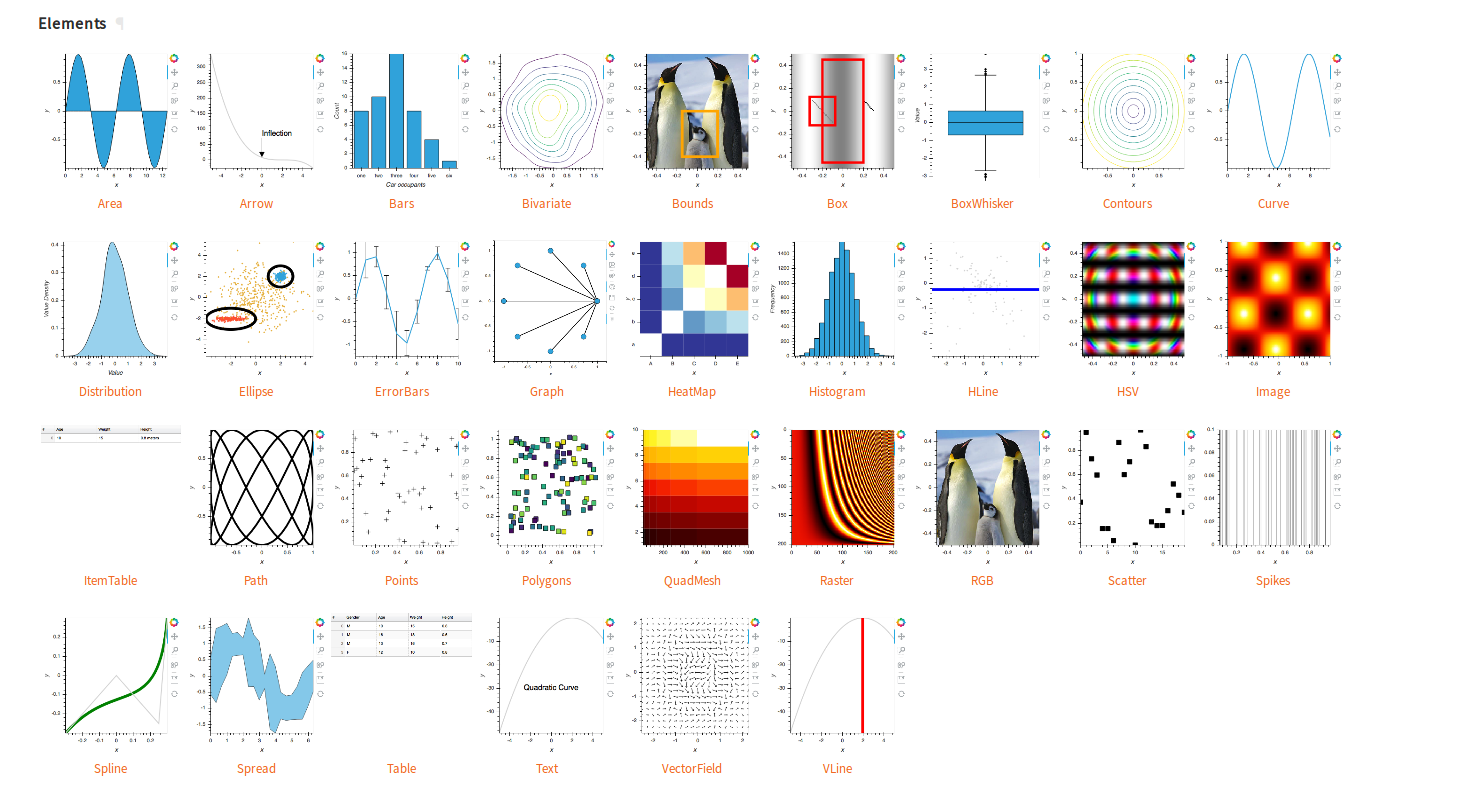

#### Example-1: A simple curve
To start with a simple example, we will sample a pair of parametrical equations in which $x$ and $y$ are both functions of a third independent parameter $time$.

$x = \sin(2t)$

$y = \sin(3t)$

at 100 different values between $0$ and $ 6.28$ and wrap that data in a HoloViews element:

In [ ]:
times = np.linspace(0, 6.28, 100)
x = np.sin(2 * times)
y = np.cos(3 * times)
simple_curve = hv.Curve((x, y))
simple_curve

Here we supplied two arrays of values as a tuple to [``hv.Curve``]((http://build.holoviews.org/reference/elements/bokeh/Curve.html), assigned the result to the attribute ``simple_curve``, and let Jupyter display the object using its default visual representation.  As you can see, that default visual representation is a Bokeh plot, which is automatically generated by HoloViews when Jupyter requests it. But ``simple_curve`` itself is just a wrapper around your data, not a plot, and you can choose other representations that are not plots.  For instance, printing the object will give you a purely textual representation instead:

In [ ]:
print(simple_curve)

The textual representation indicates that this object is a continuous mapping from `x` to `y`, which is how HoloViews knew to render it as a continuous curve.  You can also access the full original data which has been converted to a Pandas dataframe:


In [ ]:
simple_curve.data.head()

There are a number of similar elements to [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) such as [``Area``](http://build.holoviews.org/reference/elements/bokeh/Area.html) and [``Scatter``](http://build.holoviews.org/reference/elements/bokeh/Scatter.html), which you can try out for yourself in the exercises.

In [ ]:
# Exercise: Try switching hv.Curve with hv.Area and hv.Scatter

In [ ]:
# Optional: 
# Look at the .data attribute of the elements you created to see the 
# raw data (as a pandas DataFrame)

#### Annotating the curve 

Wrapping your data (``x`` and ``y``),  here as a HoloViews element is sufficient to make it visualizable, but there are many other aspects of the data that we can capture to convey more about its meaning to HoloViews. For instance, we might want to specify what the x-axis and y-axis actually correspond to, in the real world. 

In [ ]:
trajectory = hv.Curve((x, y), kdims=['variable-1'], vdims=['variable-2'])
trajectory

Here we have added *semantic* information about our data to the [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) element.  Specifically, we told HoloViews that the ``kdim`` or *key dimension* of our data corresponds to the real-world independent variable ('variable-2'), and the ``vdim`` or *value dimension* 'variable-1' is the real-world dependent variable. Even though the additional information we provided is about the *data*, not directly about the plot, HoloViews is designed to reveal the properties of your data accurately, and so the axes now update to show what these dimensions represent.

#### Example-2: Using Image element

In [ ]:
x = np.linspace(0, 10, 500)
y = np.linspace(0, 10, 500)
xx, yy = np.meshgrid(x, y)
arr = np.sin(np.cos(np.tan(xx))) * np.sin(np.cos(np.tan(yy)))
image = hv.Image(arr)

As above, we know that this data was sampled from a continuous function, but this time the data is mapping from *two* key dimensions, so we declare it as an [``hv.Image``](http://build.holoviews.org/reference/elements/bokeh/Image.html) object.  As you might expect, an ``Image`` object is visualized as an image by default:

In [ ]:
image

In [ ]:
# Exercise: Try visualizing different two-dimensional arrays.
# You can try a new function entirely or simple modifications of the existing one
# E.g., explore the effect of squaring and cubing the tangent term

In [ ]:
# Optional: Try supplying appropriate labels for the x- and y- axes
# Hint: The x,y positions are how you *index* (or key) the array *values* (so x and y are both kdims)

### Selecting columns from tables to make elements


In addition to basic Python datatypes and [xarray](xarray.pydata.org) and [NumPy](www.numpy.org) array types, HoloViews elements can be passed tabular data in the form of pandas [DataFrames](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html):


In [ ]:
weather_station_data = pd.read_parquet('../datasets/weather_station_data.parquet')
weather_station_data.head()

In [ ]:
weather_station_data.tail()

In [ ]:
# get a list of unique stations
weather_station_data['station'].unique()

This dataset was retrieved from [The Iowa Environmental Mesonet (IEM)](http://mesonet.agron.iastate.edu/). It consists of data from Illinois’ five stations (Champaign, Decatur, Midway, O’Hare, 'Bloomington/Norm')

Let's build an element that helps us understand how the max temperature in Midway varies over time. As our dataframe contains weather data for five stations, let us select the Midway from the table and create a [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) element from it:

In [ ]:
# select data for Midway station only 
midway = weather_station_data[weather_station_data['station'] == 'MDW']

In [ ]:
midway.head()

In [ ]:
max_temperature_curve = hv.Curve(midway, kdims=['date'], vdims=['max_temp_f'])
max_temperature_curve

In this case, declaring the ``kdims`` and ``vdims`` does not simply declare the axis labels, it allows HoloViews to discover which columns of the data should be used from the dataframe for each of the axes.

In [ ]:
### Exercise: Plot the max temperature over year

### Dimension labels

In this example, the simplistic axis labels are starting to get rather limiting. Changing the ``kdims`` and ``vdims`` is no longer trivial either, as they need to match the column names in the dataframe. Is the only solution to rename the columns in our dataframe to something more descriptive but more awkward to type?

Luckily, no. The recommendation is that you continue to use short, programmer and pandas-friendly, [tab-completeable](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe-column-attribute-access-and-ipython-completion) column names as these are also the most convenient dimension names to use with HoloViews.
 
What you should do instead is set the *dimension labels*, using the fact that dimensions are full, rich objects behind the scenes: 

In [ ]:
max_temp = max_temperature_curve.redim.label(max_temp_f='Max temperature')
max_temp

 With the ``redim`` method, we have associated a *dimension label* with the ``max_temperature_curve`` dimension, resulting in a new element called ``max_temp`` (you can check for yourself that ``max_temp`` is unchanged). Let's look at what the new dimension contains:

In [ ]:
max_temp.vdims

The ``redim`` utility lets you easily change other [dimension parameters](), and as an example let's give maximum temperature dimension the appropriate unit:


In [ ]:
max_temp.redim.unit(max_temp_f='F')

### Composing elements together

Viewing a single element at a time often conveys very little information for the space used. In this section, we introduce the two composition operators ``+`` and ``*`` to build [``Layout``](http://build.holoviews.org/reference/containers/bokeh/Layout.html) and [``Overlay``](http://build.holoviews.org/reference/containers/bokeh/Overlay.html) objects.

#### Layouts
Earlier on we were casting parametric equations to different element types. Viewing the different types was awkward, wasting lots of vertical space in the notebook. What we will often want to do is view these elements side by side:

In [ ]:
layout = trajectory + hv.Scatter(trajectory) + hv.Area(trajectory) + hv.Spikes(trajectory)
layout.cols(2)

What we have created with the ``+`` operator is an [``hv.Layout``](http://build.holoviews.org/reference/containers/bokeh/Layout.html) object (with a hint that a two-column layout is desired):

In [ ]:
print(layout)

Now let us build a new layout by selecting elements from ``layout``:

In [ ]:
layout.Curve.I + layout.Spikes.I 

We see that a ``Layout`` lets us pick component elements via two levels of tab-completable attribute access. Note that by default the type of the element defines the first level of access and the second level of access automatically uses Roman numerals (because Python identifiers cannot start with numbers).

These two levels correspond to another type of semantic declaration that applies to the elements directly (rather than their dimensions), called ``group`` and ``label``.  Specifically, ``group`` allows you to declare what kind of thing this object is, while ``label`` allows you to label which specific object it is.  What you put in those declarations, if anything, will form the title of the plot:

In [ ]:
particle = trajectory.relabel('Particle-1', group='Trajectory')
integral = hv.Area(trajectory).relabel('Filled', group='Trajectory')
labelled_layout = particle + integral
labelled_layout 

#### Overlays

Layout places objects side by side, allowing it to collect (almost!) any HoloViews objects that you want to indicate are related.  Another operator ``*`` allows you to overlay elements into a single plot, if they live in the same space (with matching dimensions and similar ranges over those dimensions).  The result of ``*`` is an [``Overlay``](http://build.holoviews.org/reference/containers/bokeh/Overlay.html):

In [ ]:
trajectory * hv.Spikes(trajectory)

The indexing system of [``Overlay``](http://build.holoviews.org/reference/containers/bokeh/Overlay.html) is identical to that of [``Layout``](http://build.holoviews.org/reference/containers/bokeh/Layout.html).

In [ ]:
# Exercise: Make an overlay of the Spikes object from layout on top of 
# the filled trajectory area of labelled_layout

 One thing that is specific to Overlays is the use of color cycles to automatically differentiate between elements of the same type and ``group``:

In [ ]:
particle_2 = particle.clone((np.sin(x), np.cos(y)), label='Particle-2')
particle + particle_2 + (particle * particle_2)

Here we use the ``clone`` method to make a particle-2 trajectory: the ``clone`` method creates a new object that preserves semantic metadata while allowing overrides (in this case we override the input data and the ``label``).

As you can see, HoloViews can determine that the two overlaid curves will be distinguished by color, and so it also provides a legend so that the mapping from color to data is clear.


## Onwards 

Later in the tutorial, we will see how elements and the principles of composition extend to *containers* which make data exploration quick, easy and interactive. Before we examine the container types, we will look at how to customize the appearance of elements, change the plotting extension and specify output formats.

For a quick demonstration related to what we will be covering, hit the kernel restart button (⟳) in the toolbar for this notebook, change ``hv.extension('bokeh')`` to ``hv.extension('matplotlib')`` in the first cell and rerun the notebook!